In [3168]:
import pandas as pd 
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3169]:
# r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
# with open('image_predictions.tsv', 'w') as f:
#     f.write(r.text)

In [3170]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [3171]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [3172]:
with open('tweet-json.txt', 'r') as f:
    tweets = "[" + ','.join(f.readlines()) + ']'

tweet_json = pd.read_json(tweets)

# Assess

### Tweeter archive assessment  

In [3173]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1413,698907974262222848,NaN,NaN,2016-02-14 16:33:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog is never sure if he's doing the right...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698907974...,10,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
1677,682059653698686977,NaN,NaN,2015-12-30 04:44:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tess. Her main passions are shelves an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682059653...,11,10,Tess,None,None,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,None,None,pupper,None
293,837820167694528512,NaN,NaN,2017-03-04 00:21:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Here's a pupper before and after being asked ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/837820167...,12,10,None,None,None,pupper,None


In [3174]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [3175]:
# twitter_archive[twitter_archive['name'] == "None"]
# twitter_archive.loc[twitter_archive['name'] == 'None']
twitter_archive['name'].isnull().value_counts()

False    2356
Name: name, dtype: int64

In [3176]:
twitter_archive['name'].value_counts()[:20]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Sadie        8
the          8
Daisy        7
Buddy        7
Toby         7
an           7
Bailey       7
Leo          6
Oscar        6
Name: name, dtype: int64

In [3177]:
twitter_archive['rating_numerator'].value_counts()

C:\Users\lpkmy\anaconda3\lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [3178]:
twitter_archive['rating_denominator'].value_counts()[:10]

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
Name: rating_denominator, dtype: int64

In [3179]:
twitter_archive['name'].unique()[:10]

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda'], dtype=object)

In [3180]:
twitter_archive['rating_numerator'].value_counts()[:10]

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
Name: rating_numerator, dtype: int64

In [3181]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Image predictions assessment

In [3182]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [3183]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Tweet JSON assessment

In [3184]:
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [3185]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [3186]:
tweet_json['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

# Quality Issues

# Twiteer archive

### Quality

- retweeted_status_timestamp, timestamp needs to be datetime 
- dog_stage should be date time
- all IDs - object
- in several columns null object are non-null 
- rating_denominator and rating_numerator have invalid values
- incorrect names or missing names in name column & 'None' Values 

### Tidiness 

- seperate replies and retweets into diffrent tables
- doggo, floofer pupper and puppo should be a single variable 

# Image prediction

### Quality

- IDs should be strings
- Drop duplicated


### Tidiness 

- p1, p2 and p3 should be categoral datatype
- p1_conf, p2_conf and p3_conf columns should be meraged, the same for p1_dog, p2_dog and p3_dog

# Tweet JSON

### Quality

- IDs should be strings
- display_text_range should be single character count 


### Tidiness 

- Drop all columns in common with archive

### Create copy to Clean

In [3187]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

# Twitter Archive Tidiness

Extract Replies and Retweets 

Define: Will create two seperate tables with foreign keys linking to WeRateDogs

In [3188]:
# Replies

reply_cols = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 
             'timestamp', 'source', 'text',
               'rating_numerator', 'rating_denominator']

replies_twitter_archive = twitter_archive_clean.query('in_reply_to_status_id == in_reply_to_status_id')[reply_cols].reset_index(drop=True)


In [3189]:
# Tweet

retweet_cols = ['tweet_id', 'source', 'retweeted_status_id', 
                'retweeted_status_user_id', 'retweeted_status_timestamp']

retweet_twitter_archive = twitter_archive_clean.query('retweeted_status_id == retweeted_status_id')[retweet_cols].reset_index(drop=True)


In [3190]:
# Twitter

archive_cols = ['tweet_id', 'timestamp', 'source', 'text', 
                'expanded_urls', 'rating_numerator','rating_denominator', 
                'name', 'doggo', 'floofer', 'pupper', 'puppo']

twitter_archive_clean = twitter_archive_clean.query('retweeted_status_id != retweeted_status_id & in_reply_to_status_id != in_reply_to_status_id')[archive_cols]


In [3191]:
twitter_archive_clean.sample(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2321,666435652385423360,2015-11-17 02:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Can you behave? You're ruining my wedding day...",https://twitter.com/dog_rates/status/666435652...,10,10,None,None,None,None,None


#### doggo, floofer pupper and puppo should be a single variable 

Define: use lambada to make doggo, floofer, pupper, and puppo columns to one single dog_stage variable

In [3192]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [3193]:
# # Replace 'None' with empty strings in individual stage columns
columns_to_clean = ['doggo', 'floofer', 'pupper', 'puppo']
for column in columns_to_clean:
    twitter_archive_clean[column].replace('None', '', inplace=True)

# Merge individual stage columns into a 'dog_stage' column
twitter_archive_clean['dog_stage'] = twitter_archive_clean[columns_to_clean].sum(axis=1)

# Handle combined stages
combined_stages = {
    'doggopupper': 'doggo, pupper',
    'doggopuppo': 'doggo, puppo',
    'doggofloofer': 'doggo, floofer'
}
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].replace(combined_stages)

# Handle missing values in 'dog_stage'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage'] == '', 'dog_stage'] = np.nan

In [3194]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [3195]:
twitter_archive_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

In [3196]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1229,713761197720473600,2016-03-26 16:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Piper. She would really like that tenn...,https://twitter.com/dog_rates/status/713761197...,12,10,Piper,NaN
1919,674269164442398721,2015-12-08 16:47:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bob. He's a Juniper Fitzsimmons. His b...,https://twitter.com/dog_rates/status/674269164...,8,10,Bob,NaN
1627,684594889858887680,2016-01-06 04:38:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""FOR THE LAST TIME I DON'T WANNA PLAY TWISTER ...",https://twitter.com/dog_rates/status/684594889...,10,10,None,NaN


### Twitter Archive Cleaning 

first we need to fix data type

Define: timestamp to datetime, id to object and dog_stage to category

In [3197]:
# check datatype before 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           336 non-null    object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


In [3198]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
retweet_twitter_archive['retweeted_status_timestamp'] = pd.to_datetime(retweet_twitter_archive.retweeted_status_timestamp)


In [3199]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('object')
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')
replies_twitter_archive['in_reply_to_user_id'] = replies_twitter_archive['in_reply_to_user_id'].astype('object')
replies_twitter_archive['in_reply_to_status_id'] = replies_twitter_archive['in_reply_to_status_id'].astype('object')
retweet_twitter_archive['retweeted_status_id'] = retweet_twitter_archive['retweeted_status_id'].astype('object')
retweet_twitter_archive['retweeted_status_user_id'] = retweet_twitter_archive['retweeted_status_user_id'].astype('object')

In [3200]:
# Check after
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           336 non-null    category           
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 149.8+ KB


### Source

Define: Given the limited size of this dataset, which contains just four values, I will manually construct a dictionary to establish value mappings. Subsequently, I will apply the replace method to facilitate the replacement process.

In [3201]:
twitter_archive_clean['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [3202]:
# replace it manually to : Twitter iphone, Vine, Twitter Web and TweetDeck

sources = {
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'
    }


twitter_archive_clean['source'] = twitter_archive_clean['source'].replace(sources)

In [3203]:
twitter_archive_clean['source'].unique()

array(['Twitter iPhone', 'Twitter Web', 'Vine', 'TweetDeck'], dtype=object)

#### fix numerator and denominator columns

Define: Fix the regex so denomiator end in 0

In [3204]:
twitter_archive_clean['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [3205]:
twitter_archive_clean['test'] = twitter_archive_clean.text.str.extract('(\d+(?:\.\d+)?/\d+(?:\.\d+)?0)', expand=True)[0]
twitter_archive_clean.dropna(subset=['test'], inplace=True)

In [3206]:
# assign new rating

twitter_archive_clean['rating_numerator'] = twitter_archive_clean.test.str.split('/').str[0].astype('float32')
twitter_archive_clean['rating_denominator'] = twitter_archive_clean.test.str.split('/').str[1].astype('int32')

In [3207]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,test
1340,704859558691414016,2016-03-02 02:43:09+00:00,Twitter iPhone,Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10.0,10,a,pupper,10/10
1507,691675652215414786,2016-01-25 17:35:00+00:00,Twitter iPhone,This is Richie and Plip. They are the best of ...,https://twitter.com/dog_rates/status/691675652...,10.0,10,Richie,NaN,10/10
1227,713909862279876608,2016-03-27 02:05:49+00:00,Vine,This is Doug. His nose is legendary af. 12/10 ...,https://vine.co/v/iDWlapaXWmm,12.0,10,Doug,NaN,12/10


In [3208]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   object             
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   source              2096 non-null   object             
 3   text                2096 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2096 non-null   float32            
 6   rating_denominator  2096 non-null   int32              
 7   name                2096 non-null   object             
 8   dog_stage           336 non-null    category           
 9   test                2096 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float32(1), int32(1), object(6)
memory usage: 149.8+ KB


In [3209]:
# now we can drop 'test'
twitter_archive_clean.drop('test', axis=1, inplace=True)


In [3210]:
twitter_archive_clean.sample(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
951,751950017322246144,2016-07-10 01:23:49+00:00,Vine,This is Lola. She's a surfing pupper. 13/10 ma...,https://vine.co/v/5WrjaYAMvMO,13.0,10,Lola,pupper


- there is records with very high value '1776' and '420' needs to be fixd, by insert mean value

In [3211]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 1776]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
979,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN


In [3212]:
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 420]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2074,670842764863651840,2015-11-29 05:52:33+00:00,Twitter iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,None,NaN


In [3213]:
# Find the mean 
twitter_archive_clean.describe()

,rating_numerator,rating_denominator
count,2096.000000,2096.000000
mean,12.149704,10.453244
std,40.346584,6.643655
min,0.000000,10.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [3214]:
twitter_archive_clean.rating_numerator.replace([1776,420], [11,11], inplace=True)


In [3215]:
# twitter_archive_clean.loc[twitter_archive_clean.rating_numerator == 420] = 11

In [3216]:
# Check if it is fixed.
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 1776]
twitter_archive_clean[twitter_archive_clean['rating_numerator'] == 420]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Create rating column

Define: create column called rating by multiple both columns to 10 then divide them.

In [3217]:
# twitter_archive_clean['rating_ratio'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator

twitter_archive_clean['rating'] = 10 * twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator'].astype(float)



In [3218]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating
864,762464539388485633,2016-08-08 01:44:46+00:00,Twitter iPhone,This is Buddy. His father was a bear and his m...,https://twitter.com/dog_rates/status/762464539...,12.0,10,Buddy,NaN,12.0
821,770293558247038976,2016-08-29 16:14:30+00:00,Twitter iPhone,This is Jackson. There's nothing abnormal abou...,https://twitter.com/dog_rates/status/770293558...,10.0,10,Jackson,NaN,10.0
20,888078434458587136,2017-07-20 16:49:33+00:00,Twitter iPhone,This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12.0,10,Gerald,NaN,12.0
2173,669324657376567296,2015-11-25 01:20:08+00:00,Twitter iPhone,Meet Ralf. He's a miniature Buick DiCaprio. Ca...,https://twitter.com/dog_rates/status/669324657...,11.0,10,Ralf,NaN,11.0
1835,676101918813499392,2015-12-13 18:10:33+00:00,Twitter iPhone,Meet Striker. He's ready for Christmas. 11/10 ...,https://twitter.com/dog_rates/status/676101918...,11.0,10,Striker,NaN,11.0


In [3219]:
twitter_archive_clean.query('rating == 1776')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating


### extracting names from tweets and set 'None' to np.nan

Define: using regex i will extract additional names from the text such named, name is, this is 

In [3220]:
# reset index to look continuous

twitter_archive_clean.reset_index(inplace=True, drop=True)

In [3221]:
# most common names

twitter_archive_clean['name'].value_counts()[:10]

None       603
a           55
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Penny        9
Tucker       9
Winston      8
the          8
Name: name, dtype: int64

In [3222]:
twitter_archive_clean['name'].unique()[:10]

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda'], dtype=object)

In [3223]:
names = twitter_archive_clean.query('name in ["a", "None", "the", "an"]').text.str\
.extract('named ([A-Z]{1}[a-z]+)|name is ([A-Z]{1}[a-z]+)|this is ([A-Z]{1}[a-z]+)', 
         expand=True)

names['summed'] = names.fillna('').sum(axis=1).replace('', np.nan)
names.drop([0,1,2], axis=1, inplace=True)


In [3224]:
twitter_archive_clean['name'].replace(["a", "None", "the", "an"], np.nan, inplace=True)
twitter_archive_clean = twitter_archive_clean.join(names)


In [3225]:
twitter_archive_clean['name'].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Tucker         9
              ..
Wishes         1
Rose           1
Theo           1
Fido           1
Christoper     1
Name: name, Length: 951, dtype: int64

In [3226]:
column = twitter_archive_clean[['name', 'summed']].fillna('').sum(axis=1)

lower_function = lambda x: '' if x.islower() else x
twitter_archive_clean['name'] = column.apply(lower_function).replace('', np.nan)
twitter_archive_clean.drop(['summed'], axis=1, inplace=True)

In [3227]:
twitter_archive_clean['name'].value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Beya           1
Kayla          1
Jersey         1
Bell           1
Christoper     1
Name: name, Length: 954, dtype: int64

In [3228]:
twitter_archive_clean['name'].sample(5)

991          Toby
1090    Kathmandu
973       Barclay
1777          NaN
1537          NaN
Name: name, dtype: object

In [3229]:
# save the dataset 

twitter_archive_clean.to_csv('twitter_archive_clean.csv')

# Image Predictions Tidiness

Drfine: reshape the data to "pass, confidence, breed and dog" using [pandas.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)

In [3230]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [3231]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [3232]:
#the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []
#create a function with if to capture the dog type and confidence level
def image(image_predictions_clean):
    if image_predictions_clean['p1_dog'] == True:
        dog_type.append(image_predictions_clean['p1'])
        confidence_list.append(image_predictions_clean['p1_conf'])
    elif image_predictions_clean['p2_dog'] == True:
        dog_type.append(image_predictions_clean['p2'])
        confidence_list.append(image_predictions_clean['p2_conf'])
    elif image_predictions_clean['p3_dog'] == True:
        dog_type.append(image_predictions_clean['p3'])
        confidence_list.append(image_predictions_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')
#series objects having index the image_predictions_clean column.        
image_predictions_clean.apply(image, axis=1)
#create new columns
image_predictions_clean['dog_type'] = dog_type
image_predictions_clean['confidence_list'] = confidence_list

In [3233]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826


In [3234]:
len(image_predictions_clean[image_predictions_clean['dog_type'] == 'Error'])

324

In [3235]:
image_predictions_clean = image_predictions_clean[image_predictions_clean['dog_type'] != 'Error']

In [3236]:
# Make sure we fix records with error
len(image_predictions_clean[image_predictions_clean['dog_type'] == 'Error'])

0

In [3237]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   int64  
 1   jpg_url          1751 non-null   object 
 2   img_num          1751 non-null   int64  
 3   p1               1751 non-null   object 
 4   p1_conf          1751 non-null   float64
 5   p1_dog           1751 non-null   bool   
 6   p2               1751 non-null   object 
 7   p2_conf          1751 non-null   float64
 8   p2_dog           1751 non-null   bool   
 9   p3               1751 non-null   object 
 10  p3_conf          1751 non-null   float64
 11  p3_dog           1751 non-null   bool   
 12  dog_type         1751 non-null   object 
 13  confidence_list  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


Define: drop duplicated

In [3238]:
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')


In [3239]:
sum(image_predictions_clean['jpg_url'].duplicated())

0

Define: Drop columns that we won't use for analysis

In [3240]:
#Delete columns
image_predictions_clean = image_predictions_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

C:\Users\lpkmy\AppData\Local\Temp\ipykernel_30944\1501280439.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  image_predictions_clean = image_predictions_clean.drop(['img_num', 'p1',


### Tweet JSON Tidiness

Define: Select metric columns missing by using: 'id', 'created_at', 'display_text_range', 'favorite_count', 'retweet_count'

In [3241]:
cols2 = ['id', 'created_at', 'display_text_range', 'favorite_count', 'retweet_count']

tweet_json_clean = tweet_json_clean.query('lang == "en"')[cols2]

#### Tweet JSON Cleaning


In [3242]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  2336 non-null   int64              
 1   created_at          2336 non-null   datetime64[ns, UTC]
 2   display_text_range  2336 non-null   object             
 3   favorite_count      2336 non-null   int64              
 4   retweet_count       2336 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 109.5+ KB


In [3243]:
# We need to change the name of column id to tweet_id
tweet_json_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

Set ID type to object

Define: set ID to type 'object' using astype()

In [3244]:
twitter_archive_clean['id'] = tweet_json_clean['tweet_id'].astype('object')

Define: We will use the range instead of length. 

In [3245]:
tweet_json_clean.head(2)

,tweet_id,created_at,display_text_range,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"[0, 85]",39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,"[0, 138]",33819,6514


In [3246]:
tweet_json_clean['character_count'] = tweet_json_clean['display_text_range'].str[1]
tweet_json_clean.drop('display_text_range', axis=1, inplace=True)

In [3247]:
tweet_json_clean.head(2)

,tweet_id,created_at,favorite_count,retweet_count,character_count
0,892420643555336193,2017-08-01 16:23:56+00:00,39467,8853,85
1,892177421306343426,2017-08-01 00:17:27+00:00,33819,6514,138


In [3248]:
tweet_json_clean.query('favorite_count != 0').to_csv('tweet_json_clean.csv', index=False)

##### Now we need to join both to single table for more analysis

In [3249]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   object             
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   source              2096 non-null   object             
 3   text                2096 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2096 non-null   float32            
 6   rating_denominator  2096 non-null   int32              
 7   name                1420 non-null   object             
 8   dog_stage           336 non-null    category           
 9   rating              2096 non-null   float64            
 10  id                  2082 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), float32(1), float64(1), int32(1), object(6)
memory usag

In [3250]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1691 non-null   int64 
 1   jpg_url          1691 non-null   object
 2   dog_type         1691 non-null   object
 3   confidence_list  1691 non-null   object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


In [3251]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   tweet_id         2336 non-null   int64              
 1   created_at       2336 non-null   datetime64[ns, UTC]
 2   favorite_count   2336 non-null   int64              
 3   retweet_count    2336 non-null   int64              
 4   character_count  2336 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(4)
memory usage: 174.0 KB


In [3252]:
#create a new dataframe that merge twitter_archive_clean and 
#image_predictions_clean
df = pd.merge(twitter_archive_clean, 
                      image_predictions_clean, 
                      how = 'left', on = ['tweet_id'])


In [3253]:
# Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   object             
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   source              2096 non-null   object             
 3   text                2096 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2096 non-null   float32            
 6   rating_denominator  2096 non-null   int32              
 7   name                1420 non-null   object             
 8   dog_stage           336 non-null    category           
 9   rating              2096 non-null   float64            
 10  id                  2082 non-null   object             
 11  jpg_url             1605 non-null   object             
 12  dog_type            1605 non-null 

In [3254]:
df = pd.merge(df, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

In [3255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2095
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2096 non-null   object             
 1   timestamp           2096 non-null   datetime64[ns, UTC]
 2   source              2096 non-null   object             
 3   text                2096 non-null   object             
 4   expanded_urls       2093 non-null   object             
 5   rating_numerator    2096 non-null   float32            
 6   rating_denominator  2096 non-null   int32              
 7   name                1420 non-null   object             
 8   dog_stage           336 non-null    category           
 9   rating              2096 non-null   float64            
 10  id                  2082 non-null   object             
 11  jpg_url             1605 non-null   object             
 12  dog_type            1605 non-null 

In [3256]:
df.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,rating,id,jpg_url,dog_type,confidence_list,created_at,favorite_count,retweet_count,character_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,13.0,892420643555336193,NaN,NaN,NaN,2017-08-01 16:23:56+00:00,39467.0,8853.0,85.0


In [3257]:
df.to_csv('twitter_archive_master.csv', index=False)

## Analysis & Visualization

##### Visualization 1: The Distribution of Dog Stages

(-1.2821451133071189,
 1.2100052336429188,
 -1.2175045086591094,
 1.2099611546075257)

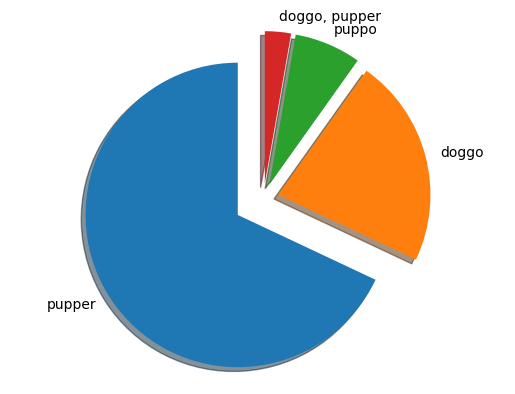

In [3258]:
life_stage_count = list(df[df['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
life_stages = df[df['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

#### Analyses

- Most tweets are about Popper, which is expected.

#### Visualization 2: Correlation between Retweets and Favorites

In [3259]:
df.describe()

,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,character_count
count,2096.000000,2096.000000,2096.000000,2088.000000,2088.000000,2088.000000
mean,11.112490,10.453244,10.609628,8983.661398,2835.050287,110.917146
std,7.896559,6.643655,2.151820,12177.070256,4669.669661,26.521318
min,0.000000,10.000000,0.000000,81.000000,16.000000,13.000000
25%,10.000000,10.000000,10.000000,2051.250000,647.750000,93.000000
50%,11.000000,10.000000,11.000000,4206.500000,1407.500000,115.000000
75%,12.000000,10.000000,12.000000,11455.750000,3293.250000,136.000000
max,204.000000,170.000000,14.000000,132810.000000,79515.000000,148.000000


Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

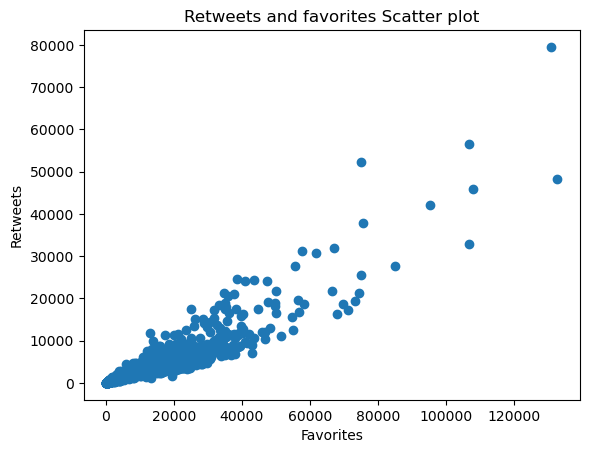

In [3260]:
plt.scatter(df['favorite_count'], df['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title ('Retweets and favorites Scatter plot')

#### Analyses

- There is correlation between the retweets and favorites.

#### Visualization 3: Correlation between Retweet and Rating

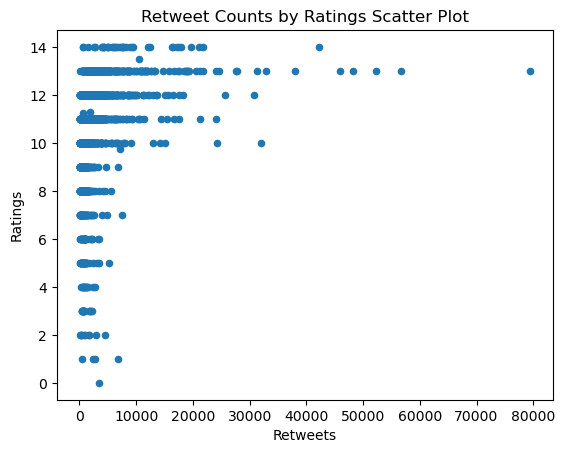

In [3265]:
df.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweets')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()


#### Analyses

- As we see, there is a correlation between Retweet and Ratings, the higher the rating means higher retweet. 



#### Visualization 4: Top Breeds

In [3262]:
breed_count = df.groupby('dog_type').count()[['tweet_id']]\
.sort_values('tweet_id', ascending=False)[:20]

In [3263]:
breed_count

,tweet_id
dog_type,
golden_retriever,140
Labrador_retriever,101
Pembroke,93
Chihuahua,86
pug,60
toy_poodle,49
chow,45
Pomeranian,41
Samoyed,38


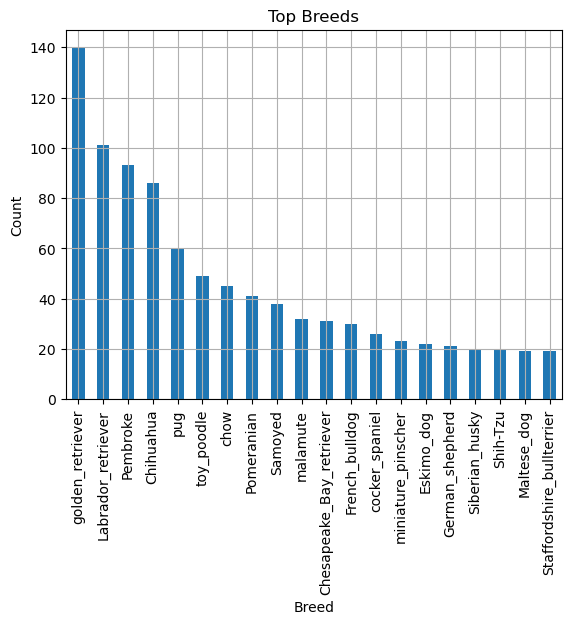

In [3264]:
breed_count.plot(kind='bar', legend=False)
plt.title("Top Breeds")
plt.xlabel("Breed")
plt.ylabel("Count")
plt.grid()

##### Analysis

- As we can see, the top breed identified by the image classifier by a wide margin is golden retriever, followed by labrador retriever.